### Problem Statement
Raul, who recently opened a burger bistro in Helsinki, aims to attract more customers through an online advertising campaign. He plans to purchase 3,000 ads daily between 11:00 a.m. and 1:00 p.m., targeting Helsinki residents. Each ad, costing one cent, will be viewed by a single resident and will feature the text: "Hungry? Try the Best Burger in Helsinki. Come to Raul’s." Raul, however, finds the default blue color of the ad text boring and believes that other colors might generate more clicks.

To determine the most effective color, Raul conducts an experiment over 20 weekdays. Each day, he runs 3,000 ads, evenly distributing them among 30 different colors (100 ads per color). The ad software tracks the daily views and clicks for each color and stores this data in a table.

Raul now needs help analyzing this data to identify any color that draws significantly more clicks than blue. Being skilled in making burgers but not in data analysis, Raul has turned to you for assistance. He offers free burgers for a year in exchange for your help in interpreting the results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### We look at the problem with following lenses
- Measure the centrality and dispersion of sampled data.
- Interpret the significance of two diverging means through p-value calculation
- Minimize mistakes associated with misleading p-value measurements.




## Processing the ad-click table in Pandas

Load and manipulate data stored in tables using Python.



In [ ]:
df = pd.read_csv('colored_ad_click_table.csv')
num_rows, num_cols = df.shape
print(f"Table contains {num_rows} rows and {num_cols} columns")

Table contains 30 rows and 41 columns


Each row represents a click event (?)

In [ ]:
df.columns

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

In [ ]:
df.Color.values

array(['Pink', 'Gray', 'Sapphire', 'Purple', 'Coral', 'Olive', 'Navy',
       'Maroon', 'Teal', 'Cyan', 'Orange', 'Black', 'Tan', 'Red', 'Blue',
       'Brown', 'Turquoise', 'Indigo', 'Gold', 'Jade', 'Ultramarine',
       'Yellow', 'Virdian', 'Violet', 'Green', 'Aquamarine', 'Magenta',
       'Silver', 'Bronze', 'Lime'], dtype=object)

In [ ]:
df.head(1)

,Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3,View Count: Day 3,Click Count: Day 4,View Count: Day 4,Click Count: Day 5,...,Click Count: Day 16,View Count: Day 16,Click Count: Day 17,View Count: Day 17,Click Count: Day 18,View Count: Day 18,Click Count: Day 19,View Count: Day 19,Click Count: Day 20,View Count: Day 20
0,Pink,21,100,20,100,14,100,30,100,12,...,23,100,15,100,22,100,19,100,20,100


Looks like we might as well delete `View Count: Day #` column

In [ ]:
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1']
print(df[selected_columns].describe())

       Click Count: Day 1  View Count: Day 1
count           30.000000               30.0
mean            23.533333              100.0
std              7.454382                0.0
min             12.000000              100.0
25%             19.250000              100.0
50%             24.000000              100.0
75%             26.750000              100.0
max             49.000000              100.0


The values in the Click Count: Day 1 column range from 12 to 49 clicks. Meanwhile, the minimum and maximum values in View Count: Day 1 are both equal to 100 views (This was expected). Also, we delete the redundant `View Count: Day #` column

In [ ]:
view_columns = [column for column in df.columns if 'View' in column]
assert np.all(df[view_columns].values == 100)

In [ ]:
df.drop(columns=view_columns, inplace=True)

print(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')


In [ ]:
df.set_index('Color', inplace=True)
print(df.T.Blue.describe())

count    20.000000
mean     28.350000
std       5.499043
min      18.000000
25%      25.750000
50%      27.500000
75%      30.250000
max      42.000000
Name: Blue, dtype: float64


We can see the min, max and mean % for the blue color. Now lets see how it compares with other colors.

##  Computing p-values from differences in means

In [ ]:
df_not_blue = df.T.drop(columns='Blue')
df_not_blue.head(2)

Color,Pink,Gray,Sapphire,Purple,Coral,Olive,Navy,Maroon,Teal,Cyan,...,Ultramarine,Yellow,Virdian,Violet,Green,Aquamarine,Magenta,Silver,Bronze,Lime
Click Count: Day 1,21,27,30,26,26,26,38,21,25,24,...,49,14,27,15,14,24,18,26,19,20
Click Count: Day 2,20,27,32,21,24,19,29,29,25,22,...,41,24,23,22,25,28,21,24,19,19


Our `df_not_blue` table contains the percent clicks for 29 colors. We would like to compare these percentages to our blue percentages. More precisely, we want to know if there exists a color whose mean click rate is statistically different from the mean click rate of blue. How do we compare these means? The sample mean for every color is easily obtainable, but we do not have a population mean. Thus, our best option is to run a permutation test. To run the test, we need to define a reusable permutation test function. The function will take as input two NumPy arrays and return a p-value as its output.

In [ ]:
def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b)
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() - sample_b.mean()) >= extreme_mean_diff:
            number_extreme_values += 1

    p_value = number_extreme_values / 30000
    return p_value

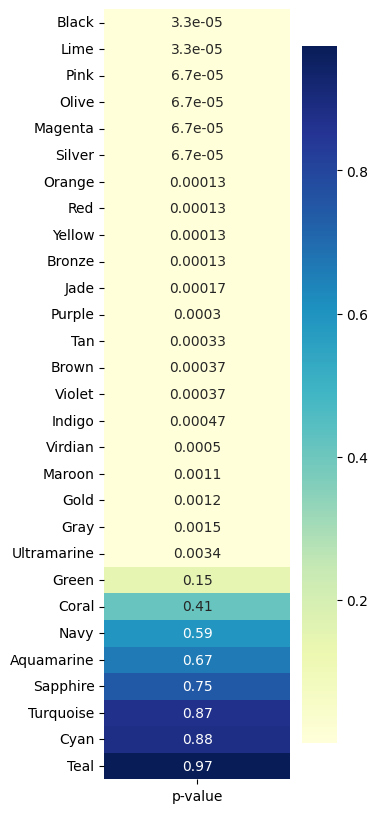

In [ ]:
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks)
    color_to_p_value[color] = p_value
sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(),
                                             key=lambda x: x[1]))
plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values],
            cmap='YlGnBu', annot=True, xticklabels=['p-value'],
            yticklabels=sorted_colors)
plt.show()

In [ ]:
mean_black = df_not_blue.Black.mean()
print(f"Mean click-rate of black is {mean_black}")

Mean click-rate of black is 21.6


In [ ]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
size = remaining_colors.size
print(f"{size} colors have on average more clicks than Blue.")
print("These colors are:")
print(remaining_colors.values)

5 colors have on average more clicks than Blue.
These colors are:
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


In [ ]:
for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
    if color in remaining_colors:
        mean = df_not_blue[color].mean()
        print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Ultramarine has a p-value of 0.0034 and a mean of 34.2
Navy has a p-value of 0.5911666666666666 and a mean of 29.3
Aquamarine has a p-value of 0.6654666666666667 and a mean of 29.2
Sapphire has a p-value of 0.7457666666666667 and a mean of 28.9
Teal has a p-value of 0.9745 and a mean of 28.45


## Determining statistical significance

Four of the colors have large p-values. Only one color has a p-value that’s small. That color is ultramarine: a special shade of blue. Its mean of 34.2 is greater than blue’s mean of 28.35. Ultramarine’s p-value is 0.0034. Is that p-value statistically significant? Well, it’s more than 10 times lower than the standard significance level of 0.05. However, that significance level does not take into account our comparisons between blue and 29 other colors. Each comparison is an experiment testing whether a color differs from blue. If we run enough experiments, then we are guaranteed to encounter a low p-value sooner or later. The best way to correct for this is to execute a `Bonferroni correction` — otherwise, we will fall victim to p-value hacking. To carry out a Bonferroni correction, we lower the significance level to 0.05 / 29.

In [ ]:
significance_level = 0.05 / 29
print(f"Adjusted significance level is {significance_level}")
if color_to_p_value['Ultramarine'] <= significance_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")

Adjusted significance level is 0.001724137931034483
Our p-value is not statistically significant


Our p-value is not statistically significant — Raul carried out too many experiments for us to draw a meaningful conclusion. Not all of these experiments were necessary. There is no valid reason to expect that black, brown, or gray would outperform blue. Perhaps if Raul had disregarded some of these colors, our analysis would have been more fruitful. Conceivably, if Raul had simply compared blue to the other five variants of blue, we might have obtained a statistically significant result. Let’s explore the hypothetical situation where Raul instigates five experiments and ultramarine’s p-value remains unchanged.

In [ ]:
hypothetical_sig_level = 0.05 / 5
print(f"Hypothetical significance level is {hypothetical_sig_level}")
if color_to_p_value['Ultramarine'] <= hypothetical_sig_level:
    print("Our hypothetical p-value would have been statistically significant")
else:
    print("Our hypothetical p-value would not have been statistically significant")

Hypothetical significance level is 0.01
Our hypothetical p-value would have been statistically significant


Under these hypothetical conditions, our results would be statistically significant. Sadly, we can’t use the hypothetical conditions to lower our significance level. We have no guarantee that rerunning the experiments would reproduce a p-value of 0.0034. P-values fluctuate, and superfluous experiments increase the chance of untrustworthy fluctuations. Given Raul's high experiment count, we simply cannot draw a statistically significant conclusion.

However, all is not lost. Ultramarine still represents a promising substitute for blue. Should Raul carry out that substitution? Perhaps. Let’s consider our two alternative scenarios. In the first scenario, the null hypothesis is true. If that’s the case, then both blue and ultramarine share the same population mean. Under these circumstances, swapping ultramarine for blue will not affect the ad click rate. In the second scenario, the higher ultramarine click rate is actually statistically significant. If that’s the case, then swapping ultramarine for blue will yield more ad clicks. Therefore, Raul has everything to gain and nothing to lose by setting all his ads to ultramarine.

From a logical standpoint, Raul should definitely swap blue for ultramarine. But if he carries out the swap, some uncertainty will remain; Raul will never know if ultramarine truly returns more clicks than blue. What if Raul's curiosity gets the best of him? If he really wants an answer, his only choice is to run another experiment. In that experiment, half the displayed ads would be blue and the other displayed ads would be ultramarine. Raul's software would exhibit the advertisements while recording all the clicks and views. Then we could recompute the p-value and compare it to the appropriate significance level, which would remain at 0.05. The Bonferroni correction would not be necessary because only a single experiment would be run. After the p-value comparison, Raul would finally know whether ultramarine outperforms blue.

Raul assumed that analyzing every single color would yield more impactful results, but he was wrong. More data isn’t necessarily better: sometimes more data leads to more uncertainty.

However, we can insist that link color should be selected scientifically via a massive analytic test that would supposedly determine the perfect shade of blue, based on all above findings.

**Reference**: Data Science Bookcamp
By Leonard Apeltsin